# Aprendizado Não supervisionado
> Clusterização : Agrupar dados semelhantes em um mesmo grupo de forma a garantir que os dados do mesmo cluster sejam os mais próximos possíveis e dados de clusters diferentes sejam os mais diferentes possíveis.
> K-means
  - K : Significa o número de grupos a se classificar. Essa variável precisa ser definida, pois impacta no resultado.
  - Etapas :
    - Seleciona aleatoriamente k pontos para servirem como centro dos clusters.
    - Calcula a distância de cada um dos outros pontos de dados a cada um dos centros
    - Atribui cada um dos pontos ao centro mais próximo
    - Com todos os pontos classificados, é gerado um novo centróide baseados nos pontos.
    - Como o novo centróide, é feito a classificação novamente utilizando a distância de cada ponto a esse centróide.
  - Esse processo acontece e se repete até a convergência do modelo. (Quando o centróide para de se movimentar)


In [3]:
# Dataset Iris
from sklearn.datasets import load_iris
features, labels = load_iris(return_X_y=True, as_frame=True)

In [4]:
# Selecionando apenas as colunas de
print("**Colunas do Dataset de Iris Completo: ", features.columns)
print("Removendo e deixando apenas as colunas de pétalas\n")
features = features.loc[:,['petal length (cm)', 'petal width (cm)']]
print("**Colunas do Dataset de Iris : ", features.columns)

**Colunas do Dataset de Iris Completo:  Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
Removendo e deixando apenas as colunas de pétalas

**Colunas do Dataset de Iris :  Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


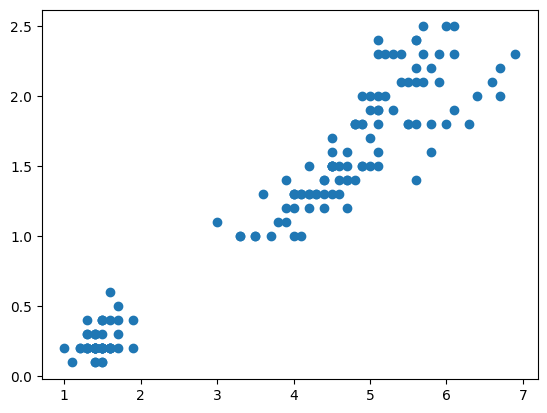

In [7]:
# Visualizando graficamente os pontos
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(features['petal length (cm)'], features['petal width (cm)'])
plt.show()

In [11]:
# Utilzando K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
# Labels determinadas pelo k-means
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

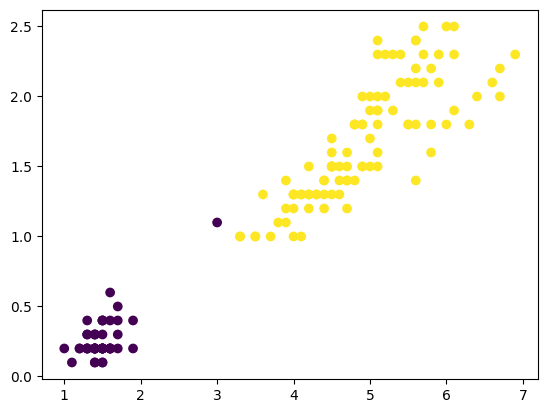

In [18]:
# Visualizando graficamente
fig, ax = plt.subplots()
ax.scatter(features['petal length (cm)'], features['petal width (cm)'], c=kmeans.labels_)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


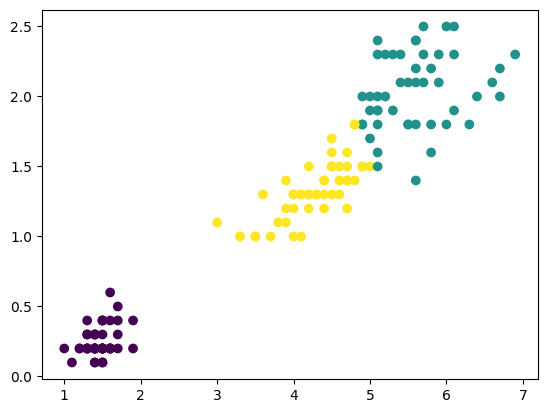

In [22]:
# K = 3
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(features)
fig, ax = plt.subplots()
ax.scatter(features['petal length (cm)'], features['petal width (cm)'], c=kmeans3.labels_)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


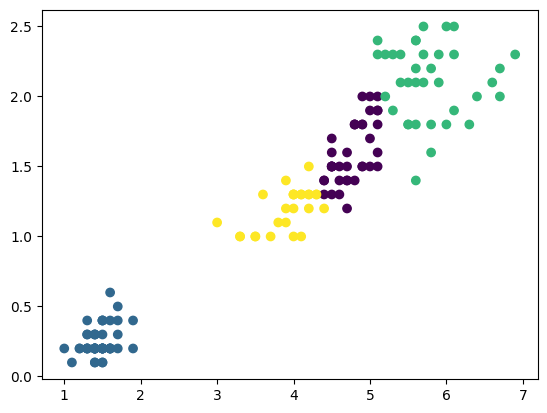

In [23]:
# K = 4
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(features)
fig, ax = plt.subplots()
ax.scatter(features['petal length (cm)'], features['petal width (cm)'], c=kmeans4.labels_)
plt.show()

# Valor bom para K
> Para determinar o melhor valor de K será usado o métoodo do Cotovelo (Elbow Method).

In [26]:
k_values = []
inertias = []

for i in range(1, 15) :
  kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(features)
  k_values.append(i)
  inertias.append(kmeans.inertia_)

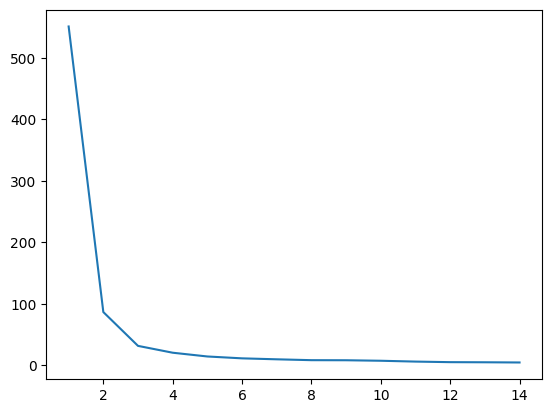

In [28]:
fig, ax = plt.subplots()
ax.plot(k_values, inertias)
plt.show()